#Imports

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model



In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Filtros

In [ ]:
image = cv2.imread("/content/drive/MyDrive/7mo Semestre /TODOSLOSMIOTUBOS/Plate1/Jared/Best/Copia de 2d2dc951-22b0-48df-b1ce-0157ca9e29fa_A2_02_05_Phi8Color (1).png", cv2.IMREAD_GRAYSCALE)

In [ ]:
_, binary_image = cv2.threshold(image, 135, 255, cv2.THRESH_BINARY)
cv2_imshow(binary_image)

Output hidden; open in https://colab.research.google.com to view.

## Erosion

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

erosion = cv2.erode(binary_image, kernel, iterations=1)

cv2_imshow(erosion)

## Dilate

In [ ]:
dilatation = cv2.dilate(binary_image, kernel, iterations=1)


cv2_imshow(dilatation)

## Morphology

In [ ]:
filter = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

cv2_imshow(filter)

#Resize

In [ ]:
import os
import cv2
import json
import numpy as np
import shutil


def load_image(image_path):
    image = cv2.imread(image_path)
    return image


def resize_image(image, target_size=(256, 256)):
    resized_image = cv2.resize(image, target_size)
    return resized_image


def load_mask(json_path):
    with open(json_path, 'r') as f:
        mask_data = json.load(f)


    mask = np.zeros((mask_data['imageHeight'], mask_data['imageWidth']), dtype=np.float32)


    for shape in mask_data['shapes']:
        points = np.array(shape['points'], dtype=np.int32)
        cv2.fillPoly(mask, [points], 1)

    return mask, mask_data

def resize_mask_and_update_json(mask, mask_data, new_image_name, target_size=(256, 256)):
    resized_mask = cv2.resize(mask, target_size)
    scale_x = target_size[0] / mask_data['imageWidth']
    scale_y = target_size[1] / mask_data['imageHeight']


    for shape in mask_data['shapes']:
        shape['points'] = [[int(point[0] * scale_x), int(point[1] * scale_y)] for point in shape['points']]


    mask_data['imageWidth'] = target_size[0]
    mask_data['imageHeight'] = target_size[1]

    mask_data['imagePath'] = new_image_name

    return resized_mask, mask_data


def process_folder(img_folder, json_folder, output_folder, target_size=(256, 256)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(img_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(img_folder, filename)
            json_path = os.path.join(json_folder, os.path.splitext(filename)[0] + '.json')

            if os.path.exists(json_path):

                original_image = load_image(img_path)
                original_mask, mask_data = load_mask(json_path)


                resized_image = resize_image(original_image, target_size)


                new_filename = os.path.splitext(filename)[0] + '_Resize' + os.path.splitext(filename)[1]
                output_image_path = os.path.join(output_folder, new_filename)

                resized_mask, updated_mask_data = resize_mask_and_update_json(original_mask, mask_data, new_filename, target_size)


                cv2.imwrite(output_image_path, resized_image)


                output_json_path = os.path.join(output_folder, os.path.splitext(filename)[0] + '_Resize.json')
                with open(output_json_path, 'w') as f:
                    json.dump(updated_mask_data, f)

                print(f"Procesado: {filename} -> {new_filename}")


img_folder = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paola/IMG NOR + JSON'
json_folder = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paola/IMG NOR + JSON'
output_folder = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paola/reeeeeee'


process_folder(img_folder, json_folder, output_folder, target_size=(256, 256))

print(f"Redimensionado completado. Los archivos redimensionados se han guardado en: {output_folder}")


Procesado: P_4.png -> P_4_Resize.png
Procesado: P_10.png -> P_10_Resize.png
Procesado: P_31.png -> P_31_Resize.png
Procesado: P_2.png -> P_2_Resize.png
Procesado: P_29.png -> P_29_Resize.png
Procesado: P_5.png -> P_5_Resize.png
Procesado: P_24.png -> P_24_Resize.png
Procesado: P_3.png -> P_3_Resize.png
Procesado: P_19.png -> P_19_Resize.png
Procesado: P_1.png -> P_1_Resize.png
Procesado: P_6.png -> P_6_Resize.png
Procesado: P_33.png -> P_33_Resize.png
Procesado: P_30.png -> P_30_Resize.png
Procesado: P_26.png -> P_26_Resize.png
Procesado: P_16.png -> P_16_Resize.png
Procesado: P_35.png -> P_35_Resize.png
Procesado: P_38.png -> P_38_Resize.png
Procesado: P_17.png -> P_17_Resize.png
Procesado: P_37.png -> P_37_Resize.png
Procesado: P_9.png -> P_9_Resize.png
Procesado: P_20.png -> P_20_Resize.png
Procesado: P_36.png -> P_36_Resize.png
Procesado: P_14.png -> P_14_Resize.png
Procesado: P_7.png -> P_7_Resize.png
Procesado: P_34.png -> P_34_Resize.png
Procesado: P_39.png -> P_39_Resize.png
Pr

## Comprobacion

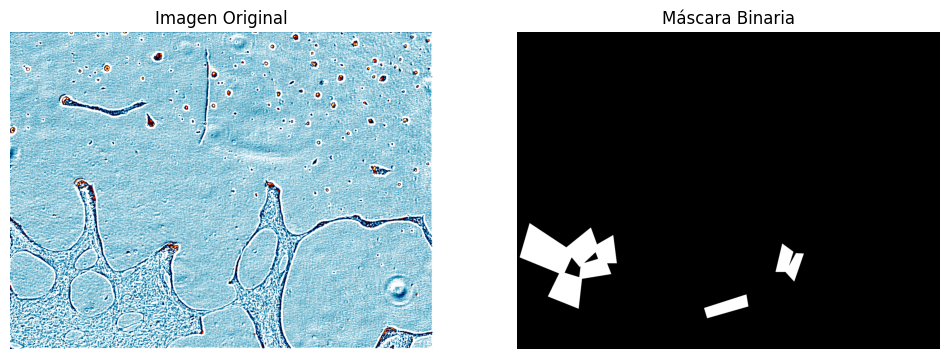

In [ ]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import os

def load_image(image_path):

    image = cv2.imread(image_path)
    return image

def create_mask_from_json(json_path, image_shape):

    with open(json_path, 'r') as f:
        data = json.load(f)


    mask = np.zeros((image_shape[0], image_shape[1]), dtype=np.uint8)

    # Dibujar las formas del JSON en la máscara
    for shape in data['shapes']:
        points = np.array(shape['points'], dtype=np.int32)
        cv2.fillPoly(mask, [points], 255)

    return mask

def display_image_and_mask(image, mask):

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")
    plt.axis('off')


    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Máscara Binaria")
    plt.axis('off')

    plt.show()


image_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paulina/IMG NOR + JSON/PA_10.png'
json_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paulina/IMG NOR + JSON/PA_10.json'


image = load_image(image_path)


mask = create_mask_from_json(json_path, image.shape)


display_image_and_mask(image, mask)


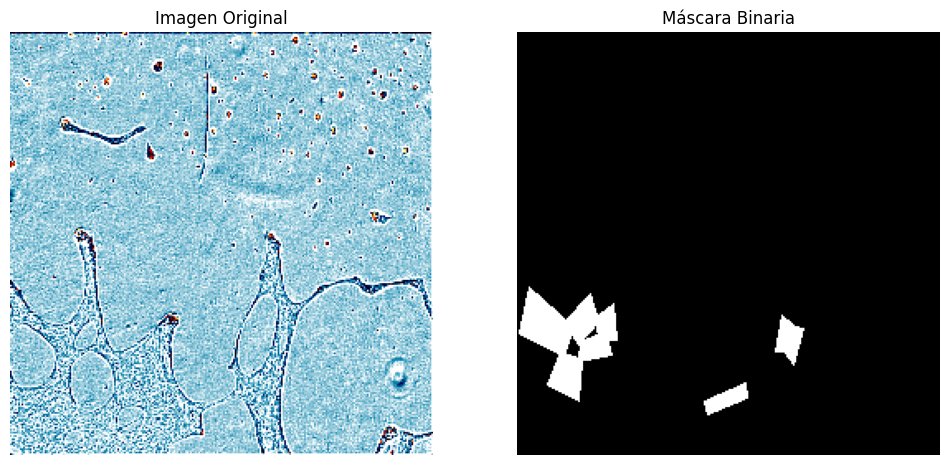

In [ ]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import os

def load_image(image_path):

    image = cv2.imread(image_path)
    return image

def create_mask_from_json(json_path, image_shape):

    with open(json_path, 'r') as f:
        data = json.load(f)


    mask = np.zeros((image_shape[0], image_shape[1]), dtype=np.uint8)

    # Dibujar las formas del JSON en la máscara
    for shape in data['shapes']:
        points = np.array(shape['points'], dtype=np.int32)
        cv2.fillPoly(mask, [points], 255)

    return mask

def display_image_and_mask(image, mask):

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")
    plt.axis('off')


    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Máscara Binaria")
    plt.axis('off')

    plt.show()


image_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paulina/IMG RESIZE + JSON RESIZE/PA_10_Resize.png'
json_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paulina/IMG RESIZE + JSON RESIZE/PA_10_Resize.json'


image = load_image(image_path)


mask = create_mask_from_json(json_path, image.shape)


display_image_and_mask(image, mask)


#DATA AUGMENTATION

## FLIP


In [ ]:
def load_image(image_path):
    return cv2.imread(image_path)

def load_json(json_path):
    with open(json_path, 'r') as f:
        mask_data = json.load(f)
    return mask_data

def flip_image_and_json(image, mask_data):

    flipped_image = cv2.flip(image, 1)

    image_width = mask_data['imageWidth']
    for shape in mask_data['shapes']:
        shape['points'] = [[image_width - point[0], point[1]] for point in shape['points']]

    return flipped_image, mask_data

def save_image_and_json(flipped_image, flipped_json, output_folder, original_filename):

    image_name = os.path.splitext(original_filename)[0] + '_flip' + os.path.splitext(original_filename)[1]
    json_name = os.path.splitext(original_filename)[0] + '_flip.json'


    flipped_json['imagePath'] = image_name


    cv2.imwrite(os.path.join(output_folder, image_name), flipped_image)


    with open(os.path.join(output_folder, json_name), 'w') as f:
        json.dump(flipped_json, f)

def process_folder(img_folder, json_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(img_folder):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            img_path = os.path.join(img_folder, filename)
            json_path = os.path.join(json_folder, os.path.splitext(filename)[0] + '.json')

            if os.path.exists(json_path):

                image = load_image(img_path)
                mask_data = load_json(json_path)


                flipped_image, flipped_json = flip_image_and_json(image, mask_data)


                save_image_and_json(flipped_image, flipped_json, output_folder, filename)

                print(f"Flip aplicado y guardado: {filename}")


img_folder = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paulina/IMG RESIZE + JSON RESIZE'
json_folder = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paulina/IMG RESIZE + JSON RESIZE'
output_folder = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Herbert/Data_Augmentation'


process_folder(img_folder, json_folder, output_folder)

print("Flip de todas las imágenes y JSONs completado.")


Flip aplicado y guardado: PA_6_Resize.png
Flip aplicado y guardado: PA_3_Resize.png
Flip aplicado y guardado: PA_10_Resize.png
Flip aplicado y guardado: PA_14_Resize.png
Flip aplicado y guardado: PA_2_Resize.png
Flip aplicado y guardado: PA_11_Resize.png
Flip aplicado y guardado: PA_12_Resize.png
Flip aplicado y guardado: PA_5_Resize.png
Flip aplicado y guardado: PA_8_Resize.png
Flip aplicado y guardado: PA_7_Resize.png
Flip aplicado y guardado: PA_1_Resize.png
Flip aplicado y guardado: PA_4_Resize.png
Flip aplicado y guardado: PA_16_Resize.png
Flip aplicado y guardado: PA_17_Resize.png
Flip aplicado y guardado: PA_18_Resize.png
Flip aplicado y guardado: PA_27_Resize.png
Flip aplicado y guardado: PA_23_Resize.png
Flip aplicado y guardado: PA_35_Resize.png
Flip aplicado y guardado: PA_19_Resize.png
Flip aplicado y guardado: PA_20_Resize.png
Flip aplicado y guardado: PA_32_Resize.png
Flip aplicado y guardado: PA_25_Resize.png
Flip aplicado y guardado: PA_36_Resize.png
Flip aplicado y gua

## ROTACION de 90,180,270

In [ ]:
import os
import cv2
import json

def load_image(image_path):
    return cv2.imread(image_path)

def load_json(json_path):
    with open(json_path, 'r') as f:
        mask_data = json.load(f)
    return mask_data

def rotate_image_and_json_90(image, mask_data):

    rotated_image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

    image_height, image_width = image.shape[:2]


    for shape in mask_data['shapes']:
        shape['points'] = [[point[1], image_height - point[0]] for point in shape['points']]


    mask_data['imageHeight'], mask_data['imageWidth'] = image_width, image_height

    return rotated_image, mask_data

def save_image_and_json(rotated_image, rotated_json, output_folder, original_filename):

    image_name = os.path.splitext(original_filename)[0] + '_90' + os.path.splitext(original_filename)[1]
    json_name = os.path.splitext(original_filename)[0] + '_90.json'


    rotated_json['imagePath'] = image_name


    cv2.imwrite(os.path.join(output_folder, image_name), rotated_image)


    with open(os.path.join(output_folder, json_name), 'w') as f:
        json.dump(rotated_json, f)

def process_folder(img_folder, json_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(img_folder):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            img_path = os.path.join(img_folder, filename)
            json_path = os.path.join(json_folder, os.path.splitext(filename)[0] + '.json')

            if os.path.exists(json_path):

                image = load_image(img_path)
                mask_data = load_json(json_path)


                rotated_image, rotated_json = rotate_image_and_json_90(image, mask_data)


                save_image_and_json(rotated_image, rotated_json, output_folder, filename)

                print(f"Rotación de 90 grados aplicada y guardada: {filename}")


img_folder = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paulina/IMG RESIZE + JSON RESIZE'
json_folder = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paulina/IMG RESIZE + JSON RESIZE'
output_folder = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Herbert/Data_Augmentation'


process_folder(img_folder, json_folder, output_folder)

print("Rotación de 90 grados de todas las imágenes y JSONs completada.")


Rotación de 90 grados aplicada y guardada: PA_6_Resize.png
Rotación de 90 grados aplicada y guardada: PA_3_Resize.png
Rotación de 90 grados aplicada y guardada: PA_10_Resize.png
Rotación de 90 grados aplicada y guardada: PA_14_Resize.png
Rotación de 90 grados aplicada y guardada: PA_2_Resize.png
Rotación de 90 grados aplicada y guardada: PA_11_Resize.png
Rotación de 90 grados aplicada y guardada: PA_12_Resize.png
Rotación de 90 grados aplicada y guardada: PA_5_Resize.png
Rotación de 90 grados aplicada y guardada: PA_8_Resize.png
Rotación de 90 grados aplicada y guardada: PA_7_Resize.png
Rotación de 90 grados aplicada y guardada: PA_1_Resize.png
Rotación de 90 grados aplicada y guardada: PA_4_Resize.png
Rotación de 90 grados aplicada y guardada: PA_16_Resize.png
Rotación de 90 grados aplicada y guardada: PA_17_Resize.png
Rotación de 90 grados aplicada y guardada: PA_18_Resize.png
Rotación de 90 grados aplicada y guardada: PA_27_Resize.png
Rotación de 90 grados aplicada y guardada: PA_23

In [ ]:

def load_image(image_path):
    return cv2.imread(image_path)

def load_json(json_path):
    with open(json_path, 'r') as f:
        mask_data = json.load(f)
    return mask_data

def rotate_image_and_json_180(image, mask_data):

    rotated_image = cv2.rotate(image, cv2.ROTATE_180)

    image_height, image_width = image.shape[:2]


    for shape in mask_data['shapes']:
        shape['points'] = [[image_width - point[0], image_height - point[1]] for point in shape['points']]

    return rotated_image, mask_data

def save_image_and_json(rotated_image, rotated_json, output_folder, original_filename):

    image_name = os.path.splitext(original_filename)[0] + '_180' + os.path.splitext(original_filename)[1]
    json_name = os.path.splitext(original_filename)[0] + '_180.json'


    rotated_json['imagePath'] = image_name


    cv2.imwrite(os.path.join(output_folder, image_name), rotated_image)


    with open(os.path.join(output_folder, json_name), 'w') as f:
        json.dump(rotated_json, f)

def process_folder(img_folder, json_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(img_folder):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            img_path = os.path.join(img_folder, filename)
            json_path = os.path.join(json_folder, os.path.splitext(filename)[0] + '.json')

            if os.path.exists(json_path):

                image = load_image(img_path)
                mask_data = load_json(json_path)


                rotated_image, rotated_json = rotate_image_and_json_180(image, mask_data)


                save_image_and_json(rotated_image, rotated_json, output_folder, filename)

                print(f"Rotación de 180 grados aplicada y guardada: {filename}")


img_folder = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paulina/IMG RESIZE + JSON RESIZE'
json_folder = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paulina/IMG RESIZE + JSON RESIZE'
output_folder = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Herbert/Data_Augmentation'


process_folder(img_folder, json_folder, output_folder)

print("Rotación de 180 grados de todas las imágenes y JSONs completada.")


Rotación de 180 grados aplicada y guardada: PA_6_Resize.png
Rotación de 180 grados aplicada y guardada: PA_3_Resize.png
Rotación de 180 grados aplicada y guardada: PA_10_Resize.png
Rotación de 180 grados aplicada y guardada: PA_14_Resize.png
Rotación de 180 grados aplicada y guardada: PA_2_Resize.png
Rotación de 180 grados aplicada y guardada: PA_11_Resize.png
Rotación de 180 grados aplicada y guardada: PA_12_Resize.png
Rotación de 180 grados aplicada y guardada: PA_5_Resize.png
Rotación de 180 grados aplicada y guardada: PA_8_Resize.png
Rotación de 180 grados aplicada y guardada: PA_7_Resize.png
Rotación de 180 grados aplicada y guardada: PA_1_Resize.png
Rotación de 180 grados aplicada y guardada: PA_4_Resize.png
Rotación de 180 grados aplicada y guardada: PA_16_Resize.png
Rotación de 180 grados aplicada y guardada: PA_17_Resize.png
Rotación de 180 grados aplicada y guardada: PA_18_Resize.png
Rotación de 180 grados aplicada y guardada: PA_27_Resize.png
Rotación de 180 grados aplicada 

In [ ]:
import os
import cv2
import json

def load_image(image_path):
    return cv2.imread(image_path)

def load_json(json_path):
    with open(json_path, 'r') as f:
        mask_data = json.load(f)
    return mask_data

def rotate_image_and_json_270(image, mask_data):

    rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

    image_height, image_width = image.shape[:2]


    for shape in mask_data['shapes']:
        shape['points'] = [[image_height - point[1], point[0]] for point in shape['points']]


    mask_data['imageHeight'], mask_data['imageWidth'] = image_width, image_height

    return rotated_image, mask_data

def save_image_and_json(rotated_image, rotated_json, output_folder, original_filename):

    image_name = os.path.splitext(original_filename)[0] + '_270' + os.path.splitext(original_filename)[1]
    json_name = os.path.splitext(original_filename)[0] + '_270.json'


    rotated_json['imagePath'] = image_name


    cv2.imwrite(os.path.join(output_folder, image_name), rotated_image)


    with open(os.path.join(output_folder, json_name), 'w') as f:
        json.dump(rotated_json, f)

def process_folder(img_folder, json_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(img_folder):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            img_path = os.path.join(img_folder, filename)
            json_path = os.path.join(json_folder, os.path.splitext(filename)[0] + '.json')

            if os.path.exists(json_path):

                image = load_image(img_path)
                mask_data = load_json(json_path)


                rotated_image, rotated_json = rotate_image_and_json_270(image, mask_data)


                save_image_and_json(rotated_image, rotated_json, output_folder, filename)

                print(f"Rotación de 270 grados aplicada y guardada: {filename}")


img_folder = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paulina/IMG RESIZE + JSON RESIZE'
json_folder = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paulina/IMG RESIZE + JSON RESIZE'
output_folder = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Herbert/Data_Augmentation'


process_folder(img_folder, json_folder, output_folder)

print("Rotación de 270 grados de todas las imágenes y JSONs completada.")


Rotación de 270 grados aplicada y guardada: PA_6_Resize.png
Rotación de 270 grados aplicada y guardada: PA_3_Resize.png
Rotación de 270 grados aplicada y guardada: PA_10_Resize.png
Rotación de 270 grados aplicada y guardada: PA_14_Resize.png
Rotación de 270 grados aplicada y guardada: PA_2_Resize.png
Rotación de 270 grados aplicada y guardada: PA_11_Resize.png
Rotación de 270 grados aplicada y guardada: PA_12_Resize.png
Rotación de 270 grados aplicada y guardada: PA_5_Resize.png
Rotación de 270 grados aplicada y guardada: PA_8_Resize.png
Rotación de 270 grados aplicada y guardada: PA_7_Resize.png
Rotación de 270 grados aplicada y guardada: PA_1_Resize.png
Rotación de 270 grados aplicada y guardada: PA_4_Resize.png
Rotación de 270 grados aplicada y guardada: PA_16_Resize.png
Rotación de 270 grados aplicada y guardada: PA_17_Resize.png
Rotación de 270 grados aplicada y guardada: PA_18_Resize.png
Rotación de 270 grados aplicada y guardada: PA_27_Resize.png
Rotación de 270 grados aplicada 

#Comprobacion


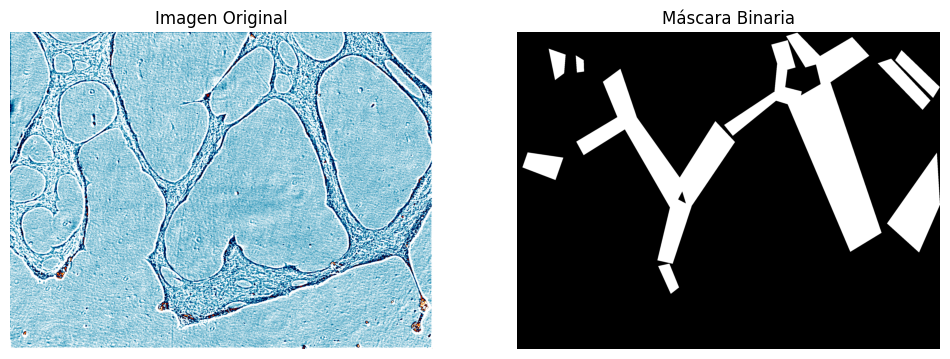

In [ ]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import os

def load_image(image_path):

    image = cv2.imread(image_path)
    return image

def create_mask_from_json(json_path, image_shape):

    with open(json_path, 'r') as f:
        data = json.load(f)


    mask = np.zeros((image_shape[0], image_shape[1]), dtype=np.uint8)


    for shape in data['shapes']:
        points = np.array(shape['points'], dtype=np.int32)
        cv2.fillPoly(mask, [points], 255)

    return mask

def display_image_and_mask(image, mask):

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")
    plt.axis('off')


    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Máscara Binaria")
    plt.axis('off')

    plt.show()


image_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Herbert/IMG NOR + JSON/H_10.png'
json_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Herbert/IMG NOR + JSON/H_10.json'


image = load_image(image_path)


mask = create_mask_from_json(json_path, image.shape)


display_image_and_mask(image, mask)


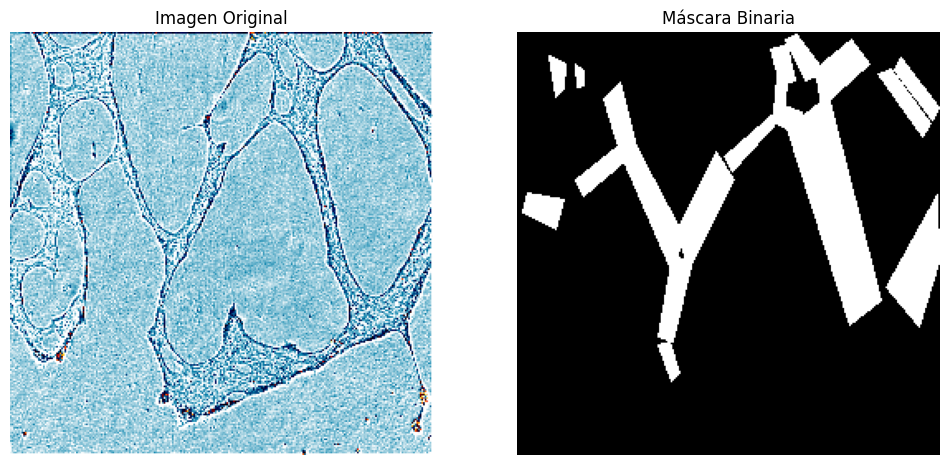

In [ ]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import os

def load_image(image_path):

    image = cv2.imread(image_path)
    return image

def create_mask_from_json(json_path, image_shape):

    with open(json_path, 'r') as f:
        data = json.load(f)


    mask = np.zeros((image_shape[0], image_shape[1]), dtype=np.uint8)


    for shape in data['shapes']:
        points = np.array(shape['points'], dtype=np.int32)
        cv2.fillPoly(mask, [points], 255)

    return mask

def display_image_and_mask(image, mask):

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")
    plt.axis('off')


    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Máscara Binaria")
    plt.axis('off')

    plt.show()


image_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Herbert/IMG RESIZE + JSON RESIZE/H_10_Resize.png'
json_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Herbert/IMG RESIZE + JSON RESIZE/H_10_Resize.json'


image = load_image(image_path)


mask = create_mask_from_json(json_path, image.shape)


display_image_and_mask(image, mask)


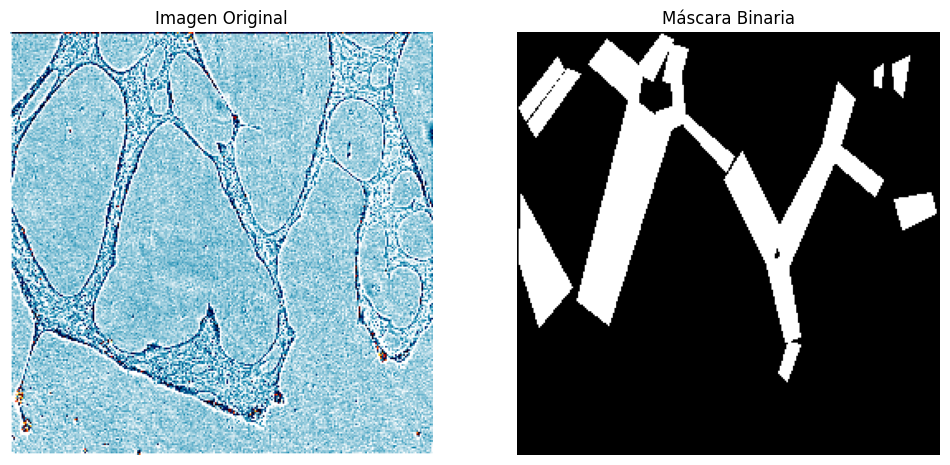

In [ ]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import os

def load_image(image_path):

    image = cv2.imread(image_path)
    return image

def create_mask_from_json(json_path, image_shape):

    with open(json_path, 'r') as f:
        data = json.load(f)


    mask = np.zeros((image_shape[0], image_shape[1]), dtype=np.uint8)


    for shape in data['shapes']:
        points = np.array(shape['points'], dtype=np.int32)
        cv2.fillPoly(mask, [points], 255)

    return mask

def display_image_and_mask(image, mask):

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")
    plt.axis('off')


    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Máscara Binaria")
    plt.axis('off')

    plt.show()


image_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Herbert/Data_Augmentation/H_10_Resize_flip.png'
json_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Herbert/Data_Augmentation/H_10_Resize_flip.json'


image = load_image(image_path)


mask = create_mask_from_json(json_path, image.shape)


display_image_and_mask(image, mask)


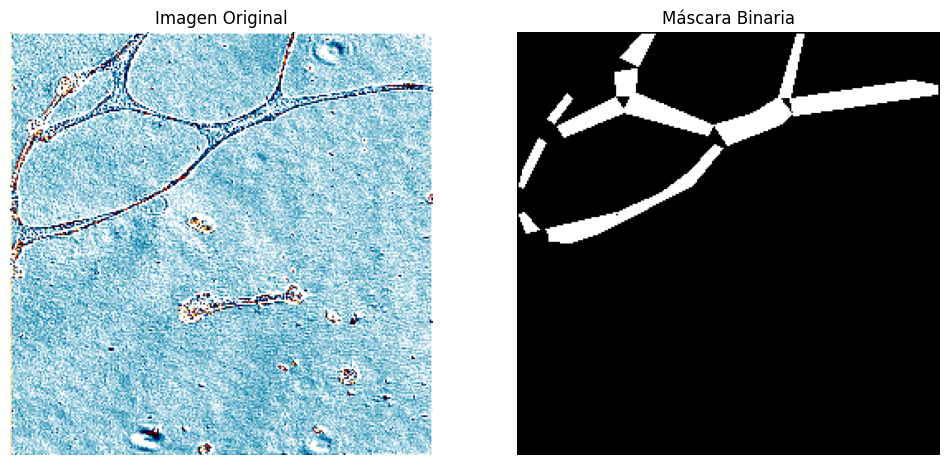

In [ ]:

def load_image(image_path):

    image = cv2.imread(image_path)
    return image

def create_mask_from_json(json_path, image_shape):

    with open(json_path, 'r') as f:
        data = json.load(f)


    mask = np.zeros((image_shape[0], image_shape[1]), dtype=np.uint8)


    for shape in data['shapes']:
        points = np.array(shape['points'], dtype=np.int32)
        cv2.fillPoly(mask, [points], 255)

    return mask

def display_image_and_mask(image, mask):

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")
    plt.axis('off')


    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Máscara Binaria")
    plt.axis('off')

    plt.show()


image_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paola/Data_Augmentation/90/P_40_Resize_90.png'
json_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paola/Data_Augmentation/90/P_40_Resize_90.json'


image = load_image(image_path)


mask = create_mask_from_json(json_path, image.shape)


display_image_and_mask(image, mask)


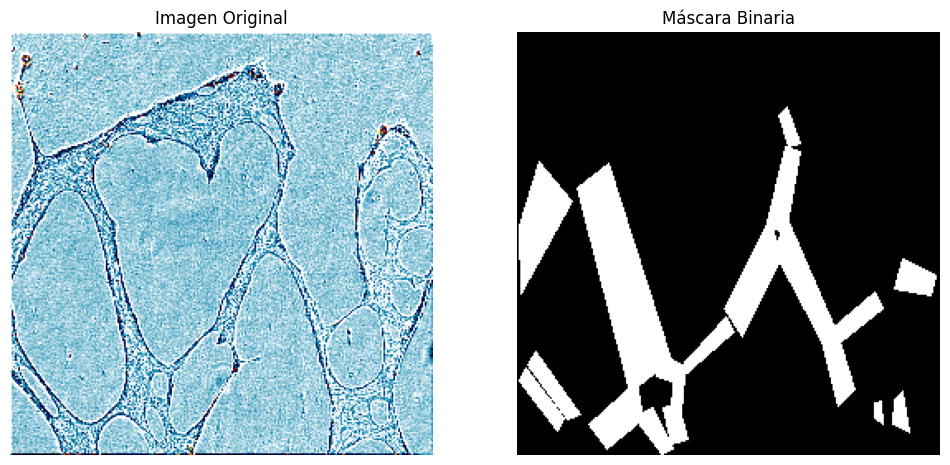

In [ ]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import os

def load_image(image_path):

    image = cv2.imread(image_path)
    return image

def create_mask_from_json(json_path, image_shape):

    with open(json_path, 'r') as f:
        data = json.load(f)


    mask = np.zeros((image_shape[0], image_shape[1]), dtype=np.uint8)


    for shape in data['shapes']:
        points = np.array(shape['points'], dtype=np.int32)
        cv2.fillPoly(mask, [points], 255)

    return mask

def display_image_and_mask(image, mask):

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")
    plt.axis('off')


    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Máscara Binaria")
    plt.axis('off')

    plt.show()


image_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Herbert/Data_Augmentation/H_10_Resize_180.png'
json_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Herbert/Data_Augmentation/H_10_Resize_180.json'


image = load_image(image_path)


mask = create_mask_from_json(json_path, image.shape)


display_image_and_mask(image, mask)


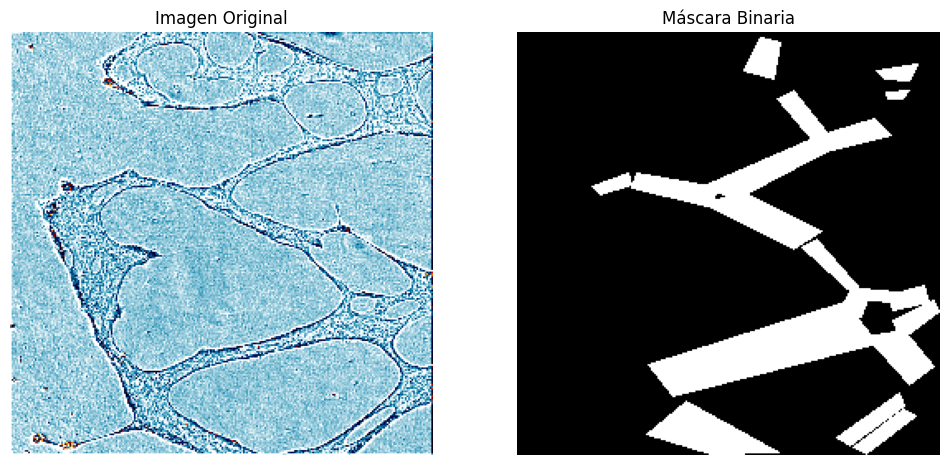

In [ ]:

def load_image(image_path):

    image = cv2.imread(image_path)
    return image

def create_mask_from_json(json_path, image_shape):

    with open(json_path, 'r') as f:
        data = json.load(f)


    mask = np.zeros((image_shape[0], image_shape[1]), dtype=np.uint8)


    for shape in data['shapes']:
        points = np.array(shape['points'], dtype=np.int32)
        cv2.fillPoly(mask, [points], 255)

    return mask

def display_image_and_mask(image, mask):

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")
    plt.axis('off')


    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Máscara Binaria")
    plt.axis('off')

    plt.show()


image_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Herbert/Data_Augmentation/H_10_Resize_270.png'
json_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Herbert/Data_Augmentation/H_10_Resize_270.json'


image = load_image(image_path)


mask = create_mask_from_json(json_path, image.shape)


display_image_and_mask(image, mask)


# Entrenamiento de CNN

In [ ]:
import os
import cv2
import json
import numpy as np
from sklearn.model_selection import train_test_split

def load_data(dataset_path):
    images = []
    masks = []

    for json_file in os.listdir(dataset_path):
        if json_file.endswith('.json'):

            json_path = os.path.join(dataset_path, json_file)
            with open(json_path) as f:
                data = json.load(f)
                image_name = data['imagePath']
                mask_data = data['shapes']


            img_path = os.path.join(dataset_path, image_name)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = image / 255.0
            images.append(image)


            mask = np.zeros(image.shape, dtype=np.float32)


            for shape in mask_data:
                if shape['label'] == 'miotubo':
                    points = np.array(shape['points'], dtype=np.int32)
                    cv2.fillPoly(mask, [points], 1)

            masks.append(mask)


    images = np.array(images).astype(np.float32)
    masks = np.array(masks).astype(np.float32)

    images = np.expand_dims(images, axis=-1)
    masks = np.expand_dims(masks, axis=-1)

    print(f"Imágenes cargadas: {images.shape}, Máscaras cargadas: {masks.shape}")
    return images, masks


dataset_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paola/reeeeeee'
X, y = load_data(dataset_path)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Imágenes cargadas: (40, 256, 256, 1), Máscaras cargadas: (40, 256, 256, 1)


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Dimensiones del conjunto de validación: {X_val.shape}, {y_val.shape}")


Dimensiones del conjunto de entrenamiento: (32, 256, 256, 1), (32, 256, 256, 1)
Dimensiones del conjunto de validación: (8, 256, 256, 1), (8, 256, 256, 1)


In [ ]:
from tensorflow.keras import layers, models

def build_unet(input_shape):
    inputs = layers.Input(shape=input_shape)


    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)


    conv5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)


    up6 = layers.UpSampling2D(size=(2, 2))(conv5)
    conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(up6)
    conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)
    concat6 = layers.concatenate([conv4, conv6], axis=3)
    conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(concat6)
    conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

    up7 = layers.UpSampling2D(size=(2, 2))(conv6)
    conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(up7)
    conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)
    concat7 = layers.concatenate([conv3, conv7], axis=3)
    conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(concat7)
    conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

    up8 = layers.UpSampling2D(size=(2, 2))(conv7)
    conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up8)
    conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)
    concat8 = layers.concatenate([conv2, conv8], axis=3)
    conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(concat8)
    conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

    up9 = layers.UpSampling2D(size=(2, 2))(conv8)
    conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up9)
    conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)
    concat9 = layers.concatenate([conv1, conv9], axis=3)
    conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(concat9)
    conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)


    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv9)


    model = models.Model(inputs=[inputs], outputs=[outputs])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


input_shape = X_train.shape[1:]
model = build_unet(input_shape)


model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_135 (Conv2D)       │ (None, 256, 256, 64)   │            640 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_136 (Conv2D)       │ (None, 256, 256, 64)   │         36,928 │ conv2d_135[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_20          │ (None, 128, 128, 64)   │              0 │ conv2d_136[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_137 (Conv2D)       │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_20[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_138 (Conv2D)       │ (None, 128, 128, 128)  │        147,584 │ conv2d_137[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_21          │ (None, 64, 64, 128)    │              0 │ conv2d_138[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_139 (Conv2D)       │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_21[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_140 (Conv2D)       │ (None, 64, 64, 256)    │        590,080 │ conv2d_139[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_22          │ (None, 32, 32, 256)    │              0 │ conv2d_140[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_141 (Conv2D)       │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_22[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_142 (Conv2D)       │ (None, 32, 32, 512)    │      2,359,808 │ conv2d_141[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_23          │ (None, 16, 16, 512)    │              0 │ conv2d_142[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_143 (Conv2D)       │ (None, 16, 16, 1024)   │      4,719,616 │ max_pooling2d_23[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_144 (Conv2D)       │ (None, 16, 16, 1024)   │      9,438,208 │ conv2d_143[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_20          │ (None, 32, 32, 1024)   │              0 │ conv2d_144[0][0]       │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_145 (Conv2D)  

 Total params: 37,646,593 (143.61 MB)

 Trainable params: 37,646,593 (143.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    batch_size=8,
                    epochs=50)


model.save('/content/sample_data/1ModeloFinal.h5')


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 995ms/step - accuracy: 0.5236 - loss: 0.8737 - val_accuracy: 0.9546 - val_loss: 0.5302
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 702ms/step - accuracy: 0.9217 - loss: 0.5454 - val_accuracy: 0.9546 - val_loss: 0.4690
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 661ms/step - accuracy: 0.9234 - loss: 0.4442 - val_accuracy: 0.9546 - val_loss: 0.1963
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 662ms/step - accuracy: 0.9273 - loss: 0.2897 - val_accuracy: 0.9546 - val_loss: 0.1936
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 662ms/step - accuracy: 0.9248 - loss: 0.2686 - val_accuracy: 0.9546 - val_loss: 0.1954
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 703ms/step - accuracy: 0.9231 - loss: 0.2715 - val_accuracy: 0.9546 - val_loss: 0.1889
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 670ms/step - accuracy: 0.9251 - loss: 0.2662 - val_accuracy: 0.9546 - val_loss: 0.1899
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 708ms/step - accuracy: 0.9224 - loss: 0.2719 - val_accuracy: 0.9546 - val_loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


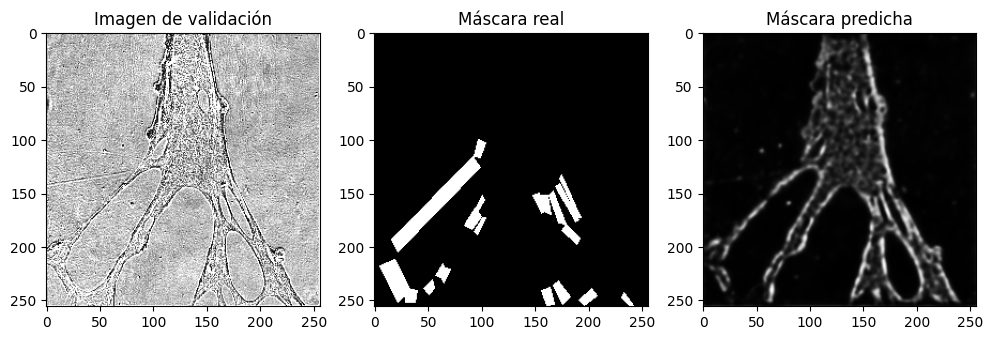

In [ ]:
import matplotlib.pyplot as plt


predictions = model.predict(X_val)


n = 6
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Imagen de validación")
plt.imshow(X_val[n].squeeze(), cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Máscara real")
plt.imshow(y_val[n].squeeze(), cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Máscara predicha")
plt.imshow(predictions[n].squeeze(), cmap='gray')

plt.show()


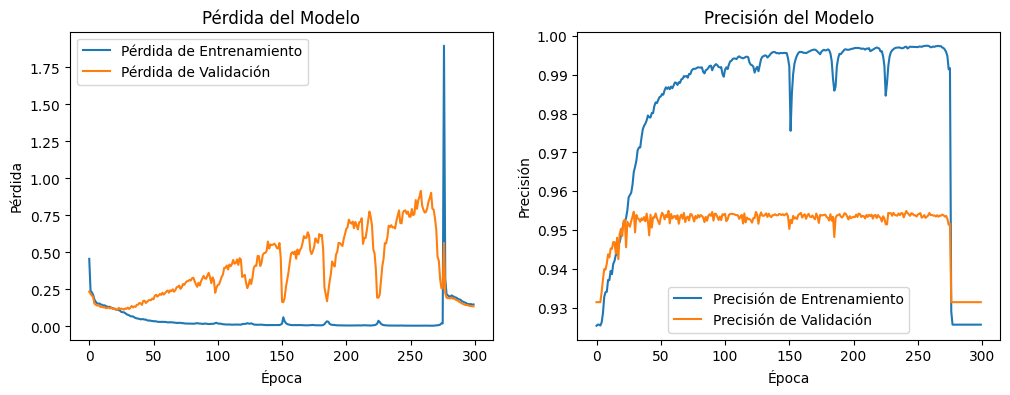

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.show()


In [ ]:

model = load_model('/content/sample_data/SeundoModeloFinal.h5')


image_dir = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG-VIDEO/Plate1_derived_A3_04_05_Phi8Color_INCOMPLETE'
save_dir = '/content/video3_rojo'
os.makedirs(save_dir, exist_ok=True)


input_height = 256
input_width = 256


for image_name in os.listdir(image_dir):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):

        image_path = os.path.join(image_dir, image_name)
        original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


        resized_image = cv2.resize(original_image, (input_width, input_height))
        input_image = resized_image / 255.0
        input_image = np.expand_dims(input_image, axis=-1)
        input_image = np.expand_dims(input_image, axis=0)


        predicted_mask = model.predict(input_image)[0]
        predicted_mask = (predicted_mask.squeeze() * 255).astype('uint8')


        _, binary_mask = cv2.threshold(predicted_mask, 127, 255, cv2.THRESH_BINARY)


        binary_mask_resized = cv2.resize(binary_mask, (original_image.shape[1], original_image.shape[0]))


        colored_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)


        colored_mask = np.zeros_like(colored_image)
        colored_mask[:, :, 2] = binary_mask_resized


        highlighted_image = cv2.addWeighted(colored_image, 0.7, colored_mask, 0.3, 0)


        output_path_colored = os.path.join(save_dir, f"imagen_con_mascara_roja_{image_name}")
        cv2.imwrite(output_path_colored, highlighted_image)

        print(f"Imagen {image_name} procesada y guardada en {output_path_colored}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step
Imagen 18.png procesada y guardada en /content/video3_rojo/imagen_con_mascara_roja_18.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Imagen 19.png procesada y guardada en /content/video3_rojo/imagen_con_mascara_roja_19.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Imagen 20.png procesada y guardada en /content/video3_rojo/imagen_con_mascara_roja_20.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Imagen 21.png procesada y guardada en /content/video3_rojo/imagen_con_mascara_roja_21.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Imagen 23.png procesada y guardada en /content/video3_rojo/imagen_con_mascara_roja_23.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Imagen 22.png procesada y guardada en /content/video3_rojo/imagen_con_mascara_roja_22.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Imagen 24.png procesada y guardada en /content/video3_rojo/imagen_con_mascara_roja_24.png


## Evaluacion del modelo

In [3]:
import os
import cv2
import json
import numpy as np
from sklearn.model_selection import train_test_split

def load_data(dataset_path):
    images = []
    masks = []

    for json_file in os.listdir(dataset_path):
        if json_file.endswith('.json'):

            json_path = os.path.join(dataset_path, json_file)
            with open(json_path) as f:
                data = json.load(f)
                image_name = data['imagePath']
                mask_data = data['shapes']


            img_path = os.path.join(dataset_path, image_name)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = image / 255.0
            images.append(image)


            mask = np.zeros(image.shape, dtype=np.float32)


            for shape in mask_data:
                if shape['label'] == 'miotubo':
                    points = np.array(shape['points'], dtype=np.int32)
                    cv2.fillPoly(mask, [points], 1)

            masks.append(mask)


    images = np.array(images).astype(np.float32)
    masks = np.array(masks).astype(np.float32)

    images = np.expand_dims(images, axis=-1)
    masks = np.expand_dims(masks, axis=-1)

    print(f"Imágenes cargadas: {images.shape}, Máscaras cargadas: {masks.shape}")
    return images, masks


dataset_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Paola/reeeeeee'
X, y = load_data(dataset_path)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Imágenes cargadas: (40, 256, 256, 1), Máscaras cargadas: (40, 256, 256, 1)


In [4]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Dimensiones del conjunto de validación: {X_val.shape}, {y_val.shape}")


Dimensiones del conjunto de entrenamiento: (32, 256, 256, 1), (32, 256, 256, 1)
Dimensiones del conjunto de validación: (8, 256, 256, 1), (8, 256, 256, 1)


In [8]:
import tensorflow as tf
from sklearn.metrics import accuracy_score


model = tf.keras.models.load_model('/content/MODEL.h5')


THRESHOLD = 0.3

predicted_masks = model.predict(X_val)
predicted_masks = (predicted_masks > THRESHOLD).astype(np.float32)


def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-6)

def iou(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return intersection / (union + 1e-6)

def accuracy(y_true, y_pred):
    return accuracy_score(y_true.flatten(), y_pred.flatten())


dice_scores = [dice_coefficient(y_true, y_pred) for y_true, y_pred in zip(y_val, predicted_masks)]
iou_scores = [iou(y_true, y_pred) for y_true, y_pred in zip(y_val, predicted_masks)]
accuracy_scores = [accuracy(y_true, y_pred) for y_true, y_pred in zip(y_val, predicted_masks)]


print(f"Promedio Dice Coefficient: {np.mean(dice_scores):.4f}")
print(f"Promedio IoU: {np.mean(iou_scores):.4f}")
print(f"Promedio Accuracy: {np.mean(accuracy_scores):.4f}")


with open("resultados_metricas.txt", "w") as f:
    f.write(f"Promedio Dice Coefficient: {np.mean(dice_scores):.4f}\n")
    f.write(f"Promedio IoU: {np.mean(iou_scores):.4f}\n")
    f.write(f"Promedio Accuracy: {np.mean(accuracy_scores):.4f}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Promedio Dice Coefficient: 0.0000
Promedio IoU: 0.0000
Promedio Accuracy: 0.9546
